In [ ]:
!pip install apyori

In [ ]:
import pandas as pd
import numpy as np
from apyori import apriori
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
store_data = pd.read_excel("Online_retail.xlsx", header=None)
display(store_data.head())
print(store_data.shape)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(7501, 20)


In [ ]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [ ]:
store_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


# EDA

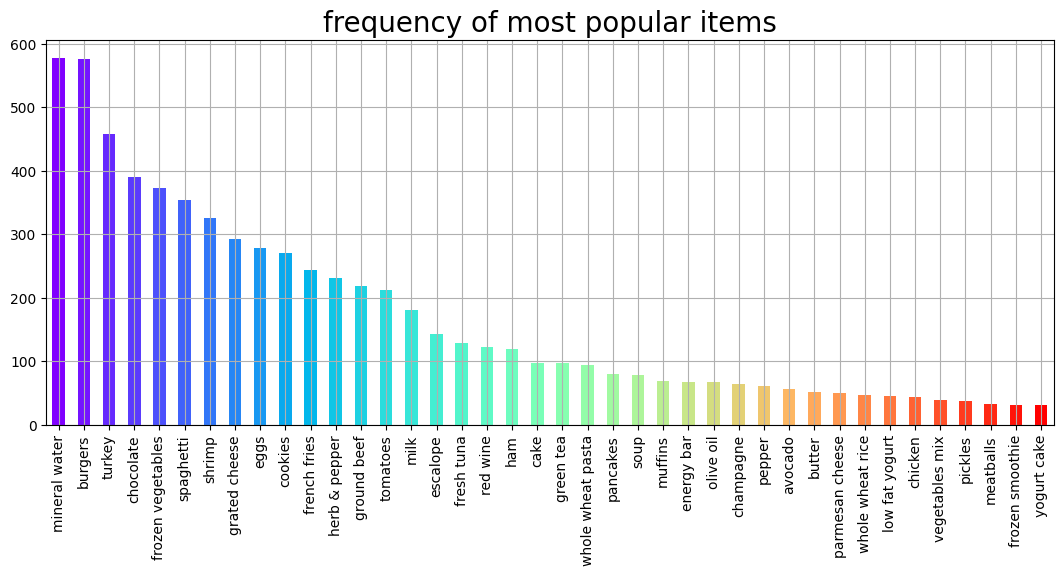

In [ ]:
color = plt.cm.rainbow(np.linspace(0, 1, 40))
store_data[0].value_counts().head(40).plot.bar(color = color, figsize=(13,5))
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [ ]:
import networkx as nx
store_data["food"] = 'Food'
food = store_data.truncate(before = -1, after = 15)
food = nx.from_pandas_edgelist(food, source = 'food', target = 0, edge_attr = True)

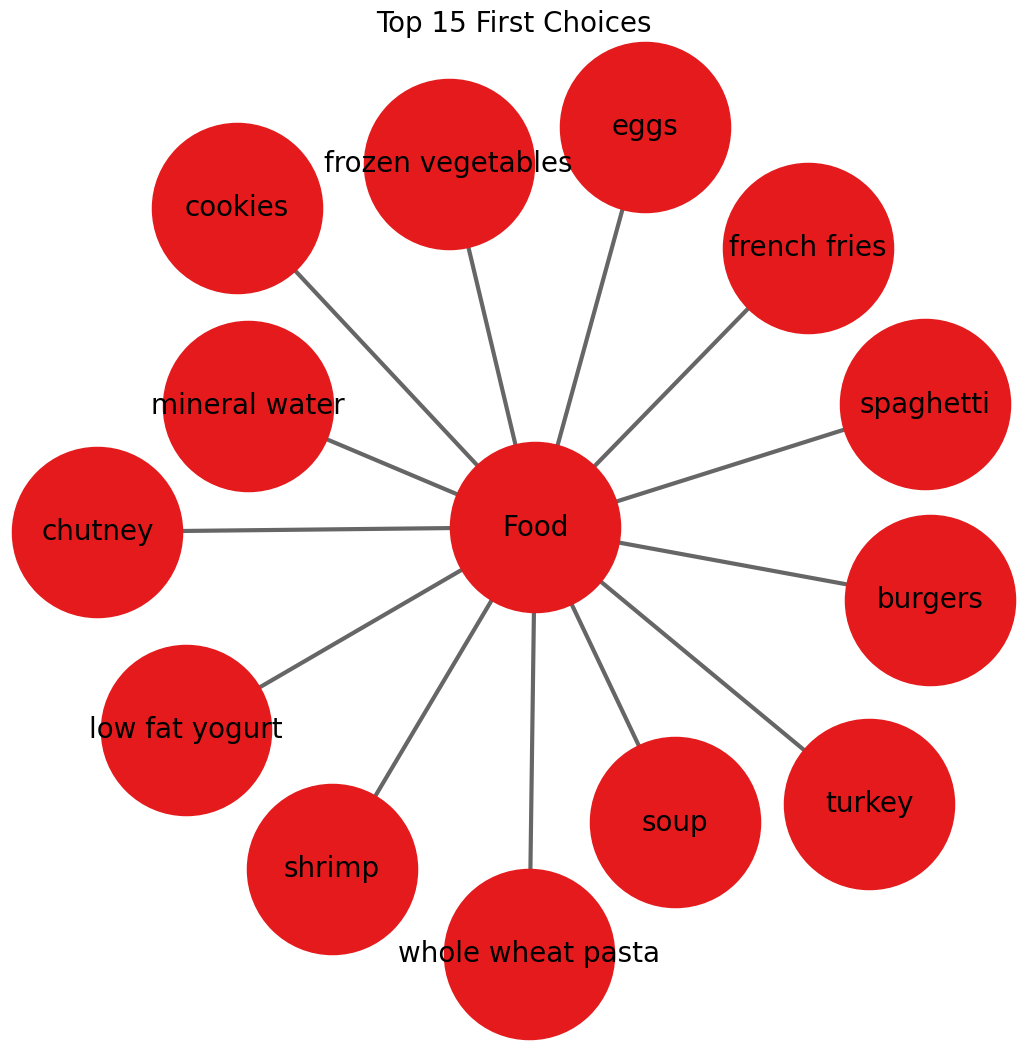

In [ ]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (13,13)
pos = nx.spring_layout(food)
color = plt.cm.Set1(np.linspace(0,15,1))
nx.draw_networkx_nodes(food,pos,node_size = 15000, node_color = color)
nx.draw_networkx_edges(food,pos,width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(food, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 20)
plt.show()

In [ ]:
#Here we need a data in form of list for Apriori Algorithm.

records = []
for i in range(1, 7501):
    records.append([str(store_data.values[i, j]) for j in range(0, 20)])

In [ ]:
print(type(records))

<class 'list'>


In [ ]:
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)

In [ ]:
print("There are {} Relation derived.".format(len(association_results)))

There are 48 Relation derived.


In [ ]:
for i in range(0, len(association_results)):
    print(association_results[i][0])

frozenset({'light cream', 'chicken'})
frozenset({'mushroom cream sauce', 'escalope'})
frozenset({'escalope', 'pasta'})
frozenset({'herb & pepper', 'ground beef'})
frozenset({'tomato sauce', 'ground beef'})
frozenset({'whole wheat pasta', 'olive oil'})
frozenset({'shrimp', 'pasta'})
frozenset({'light cream', 'nan', 'chicken'})
frozenset({'chocolate', 'shrimp', 'frozen vegetables'})
frozenset({'cooking oil', 'ground beef', 'spaghetti'})
frozenset({'mushroom cream sauce', 'nan', 'escalope'})
frozenset({'nan', 'escalope', 'pasta'})
frozenset({'spaghetti', 'ground beef', 'frozen vegetables'})
frozenset({'olive oil', 'milk', 'frozen vegetables'})
frozenset({'shrimp', 'mineral water', 'frozen vegetables'})
frozenset({'spaghetti', 'olive oil', 'frozen vegetables'})
frozenset({'spaghetti', 'shrimp', 'frozen vegetables'})
frozenset({'spaghetti', 'tomatoes', 'frozen vegetables'})
frozenset({'grated cheese', 'ground beef', 'spaghetti'})
frozenset({'herb & pepper', 'ground beef', 'mineral water'})


In [ ]:
for item in association_results:
    # first index of the inner list
    # Contains base item and add item
    pair = item[0]
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    # second index of the inner list
    print("Support: " + str(item[1]))

    # third index of the list located at 0th
    # of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: light cream -> chicken
Support: 0.004533333333333334
Confidence: 0.2905982905982906
Lift: 4.843304843304844
Rule: mushroom cream sauce -> escalope
Support: 0.005733333333333333
Confidence: 0.30069930069930073
Lift: 3.7903273197390845
Rule: escalope -> pasta
Support: 0.005866666666666667
Confidence: 0.37288135593220345
Lift: 4.700185158809287
Rule: herb & pepper -> ground beef
Support: 0.016
Confidence: 0.3234501347708895
Lift: 3.2915549671393096
Rule: tomato sauce -> ground beef
Support: 0.005333333333333333
Confidence: 0.37735849056603776
Lift: 3.840147461662528
Rule: whole wheat pasta -> olive oil
Support: 0.008
Confidence: 0.2714932126696833
Lift: 4.130221288078346
Rule: shrimp -> pasta
Support: 0.005066666666666666
Confidence: 0.3220338983050848
Lift: 4.514493901473151
Rule: light cream -> nan
Support: 0.004533333333333334
Confidence: 0.2905982905982906
Lift: 4.843304843304844
Rule: chocolate -> shrimp
Support: 0.005333333333333333
Confidence: 0.23255813953488372
Lift: 3.2601

In [ ]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

In [ ]:
pip install mlxtend

     ---------------------------------------- 1.4/1.4 MB 4.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
te = TransactionEncoder()
te_try = te.fit(dataset).transform(dataset)

In [ ]:
df = pd.DataFrame(te_try, columns=te.columns_)

In [ ]:
df

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


In [ ]:
#Model Training

In [ ]:
from mlxtend.frequent_patterns import apriori

In [ ]:
apriori(df,min_support=0.5)

,support,itemsets
0,0.8,(3)
1,1.0,(5)
2,0.6,(6)
3,0.6,(8)
4,0.6,(10)
5,0.8,"(3, 5)"
6,0.6,"(8, 3)"
7,0.6,"(5, 6)"
8,0.6,"(8, 5)"
9,0.6,"(10, 5)"


In [ ]:
#Model Training with Column Result return

apriori(df,min_support=0.5, use_colnames=True)

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Kidney Beans, Eggs)"
6,0.6,"(Onion, Eggs)"
7,0.6,"(Kidney Beans, Milk)"
8,0.6,"(Onion, Kidney Beans)"
9,0.6,"(Yogurt, Kidney Beans)"


# Calculate the length of Itemset

In [ ]:
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.8,(Eggs),1
1,1.0,(Kidney Beans),1
2,0.6,(Milk),1
3,0.6,(Onion),1
4,0.6,(Yogurt),1
5,0.8,"(Kidney Beans, Eggs)",2
6,0.6,"(Onion, Eggs)",2
7,0.6,"(Kidney Beans, Milk)",2
8,0.6,"(Onion, Kidney Beans)",2
9,0.6,"(Yogurt, Kidney Beans)",2


In [ ]:
#Length is 2 and Support is > 0.8

In [ ]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) & (frequent_itemsets['support'] >= 0.8) ]

,support,itemsets,length
5,0.8,"(Kidney Beans, Eggs)",2


In [ ]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'Onion', 'Eggs'} ]

,support,itemsets,length
6,0.6,"(Onion, Eggs)",2


# Verbose return the number of iteration and itemset default size

In [ ]:
apriori(df, min_support=0.6, use_colnames=True, verbose=1)

Processing 21 combinations | Sampling itemset size 3


,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Kidney Beans, Eggs)"
6,0.6,"(Onion, Eggs)"
7,0.6,"(Kidney Beans, Milk)"
8,0.6,"(Onion, Kidney Beans)"
9,0.6,"(Yogurt, Kidney Beans)"


In [ ]:
#Using Max_len set the itemset
apriori(df, min_support=0.6, use_colnames=True, verbose=1, max_len=3)

Processing 21 combinations | Sampling itemset size 3


,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Kidney Beans, Eggs)"
6,0.6,"(Onion, Eggs)"
7,0.6,"(Kidney Beans, Milk)"
8,0.6,"(Onion, Kidney Beans)"
9,0.6,"(Yogurt, Kidney Beans)"


# **Interview Questions**

## 1.	What is lift and why is it important in Association rules?

### What is Lift?

**Lift tells you how much the presence of one item in a transaction increases the chances of another item being present, compared to if there was no relationship between the items.**

### Why is Lift Important in Association Rules?

**Finds Strong Associations: Lift helps to find the strong associations between items, meaning it can identify which products are often bought together more often than would be expected by chance.**

**Eliminates Random Patterns: Sometimes, two items might be bought together purely by coincidence. Lift helps filter out these random patterns by showing which item combinations have a real relationship.**

**Ranks Rules: Lift helps you prioritize which association rules are the most useful. Higher lift values mean a stronger relationship between the items.**

# 2.	What is support and Confidence. How do you calculate them?

### What is Support?

**Support tells you how often a particular item or combination of items appears in your dataset.**

### What is Confidence?

**Confidence measures how often the rule turns out to be true. In other words, it tells you the likelihood of buying one item when another item is already in the cart.**

## Why Support and Confidence Are Important

**Support helps identify which item combinations are popular and occur frequently in your dataset. High support means that the item pair is common among your transactions.**

**Confidence helps evaluate how reliable an association rule is. High confidence means that when one item is purchased, the other item is also likely to be purchased.**

# 3.	What are some limitations or challenges of Association rules mining

### 1. **Scalability**
### 2. **High Dimensionality**
### 3. **Meaningful Rules vs. Statistical Noise**
### 4. **Choosing Support and Confidence Thresholds**
### 5. **Lack of Temporal Information**
### 6. **Interpreting Results**
### 7. **Sparsity of Data**
### 8. **Overfitting**